<a href="https://colab.research.google.com/github/chanpaulamol/Image_Processing_Computer_Vision/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# Access my drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the libraries
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Implement 6 template matching methods in OpenCV using the cats_and_bunnies.jpg
and cat2_templatejpg.jpg images as templates.

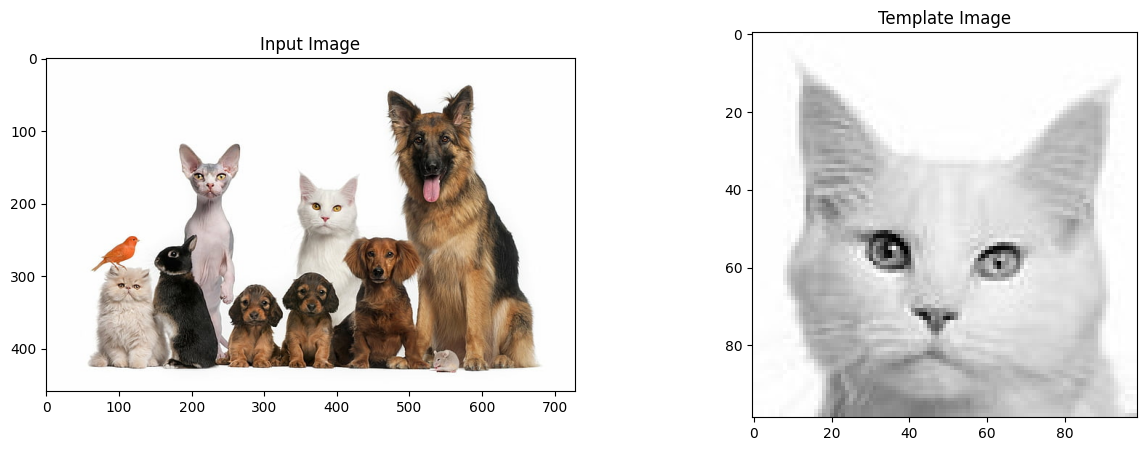

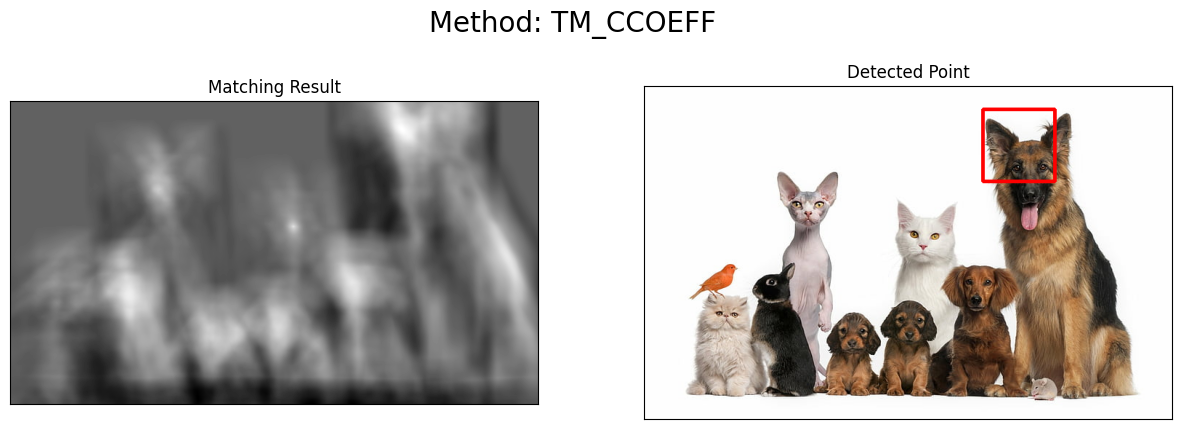

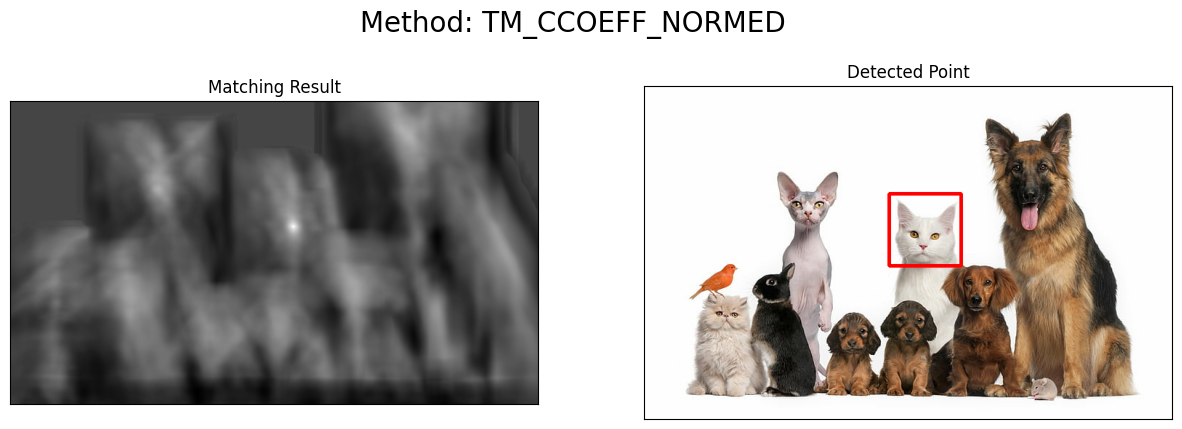

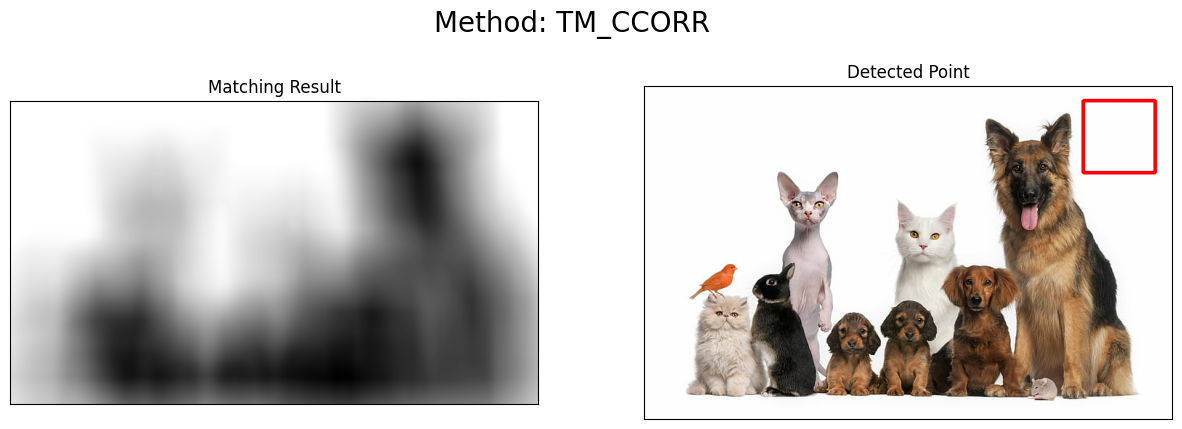

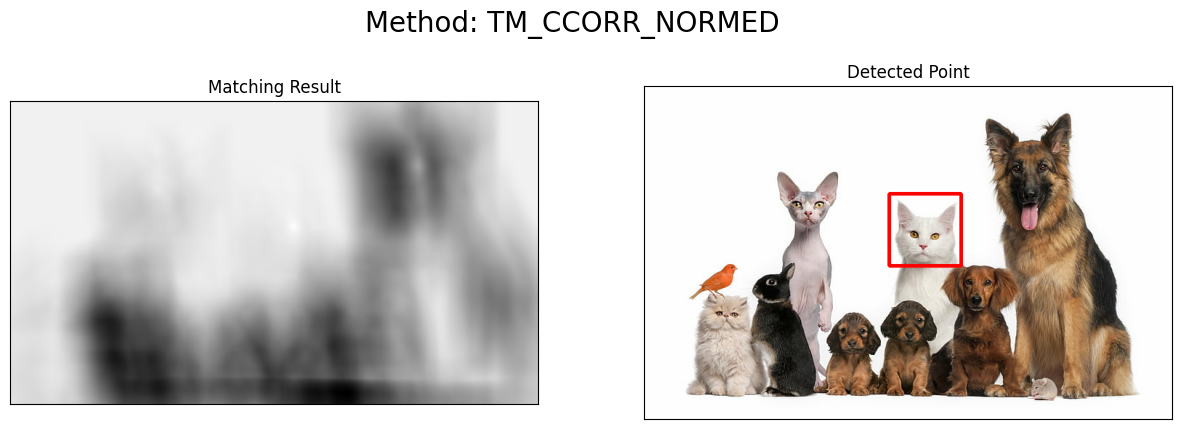

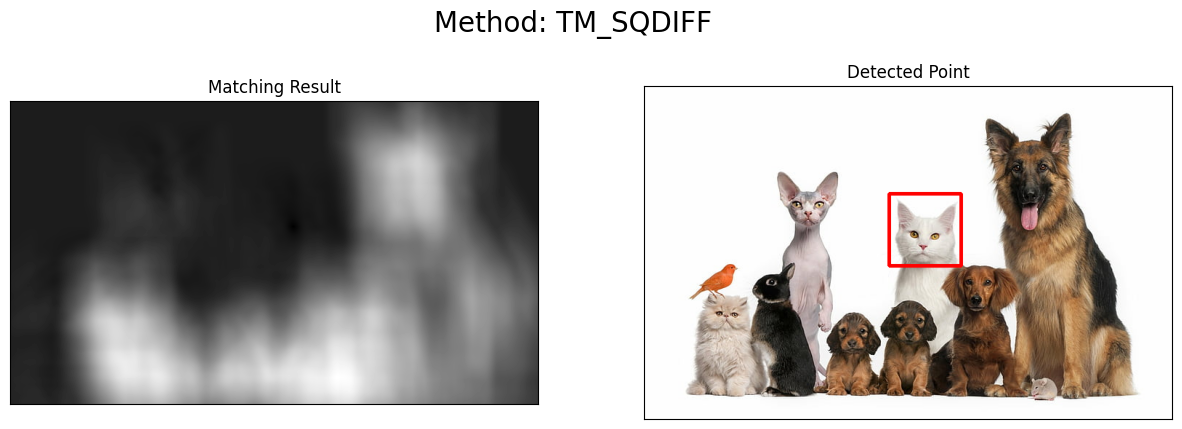

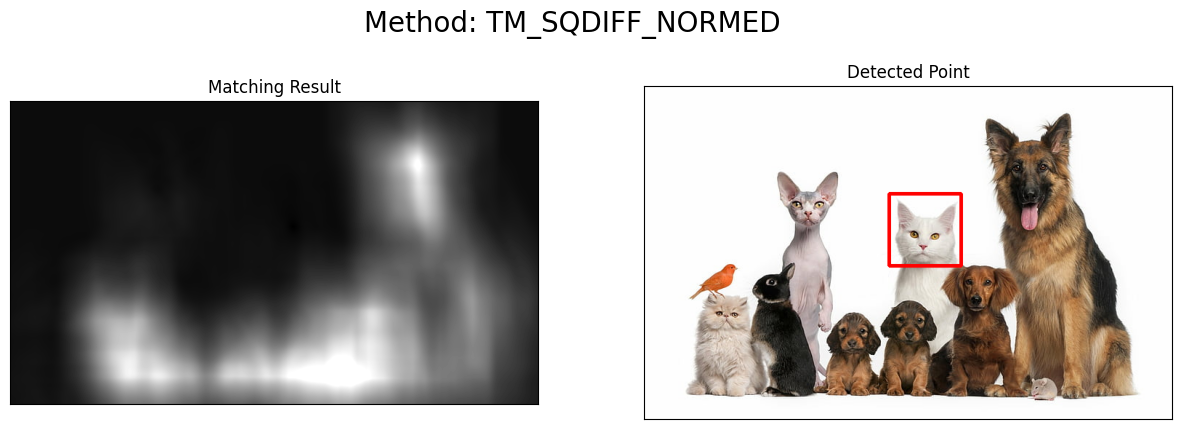

In [4]:
# Read input image
image = cv.imread('/content/drive/MyDrive/PCVK/object_detection/animal.jpg')
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_copy = image.copy()

# Read template image
template = cv.imread('/content/drive/MyDrive/PCVK/object_detection/animal-template.jpg', 0)
width, height = template.shape[::-1]

# Create subplots for input and template images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
axes[0].set_title("Input Image")
axes[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
axes[1].set_title("Template Image")

# Define the comparison methods
comparison_methods = [cv.TM_CCOEFF, cv.TM_CCOEFF_NORMED, cv.TM_CCORR,
                      cv.TM_CCORR_NORMED, cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]
method_names = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
                'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

# Iterate over the methods
for method, method_name in zip(comparison_methods, method_names):
    image = image_copy.copy()
    # Apply template matching
    result = cv.matchTemplate(image_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
    
    # Determine the top left and bottom right corners of the bounding box
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the bounding box on the image
    cv.rectangle(image, top_left, bottom_right, (0, 0, 255), 3)

    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(result, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(f"Method: {method_name}", fontsize=20)
    plt.show()



Implement the Sobel Edge Detection, Canny Edge Detection, and Laplacian Edge
Detection methods in OpenCV using the parking-lot-cars.jpg image.

 Sobel Edge Detection

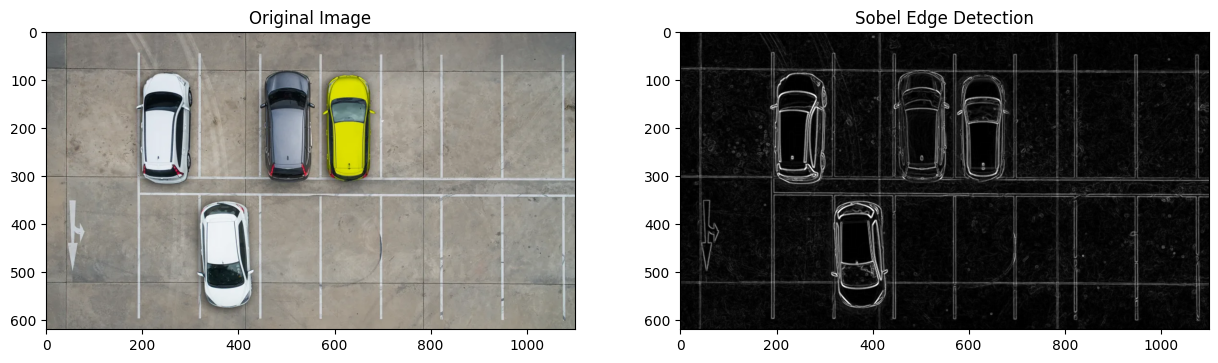

In [5]:
# Read the image
image_car = cv.imread('/content/drive/MyDrive/PCVK/object_detection/car-park.jpg')

# Convert to grayscale
gray = cv.cvtColor(image_car, cv.COLOR_BGR2GRAY)

# Remove noise
blurred = cv.GaussianBlur(gray, (3, 3), 0)

# Apply Sobel filtering
sobel_x = cv.Sobel(blurred, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(blurred, cv.CV_64F, 0, 1, ksize=3)

# Combine horizontal and vertical Sobel gradients
sobel_edges = cv.addWeighted(cv.convertScaleAbs(sobel_x), 0.5, cv.convertScaleAbs(sobel_y), 0.5, 0)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(cv.cvtColor(image_car, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[1].imshow(sobel_edges, cmap='gray')
axes[1].set_title("Sobel Edge Detection")
plt.show()

Canny edge detection

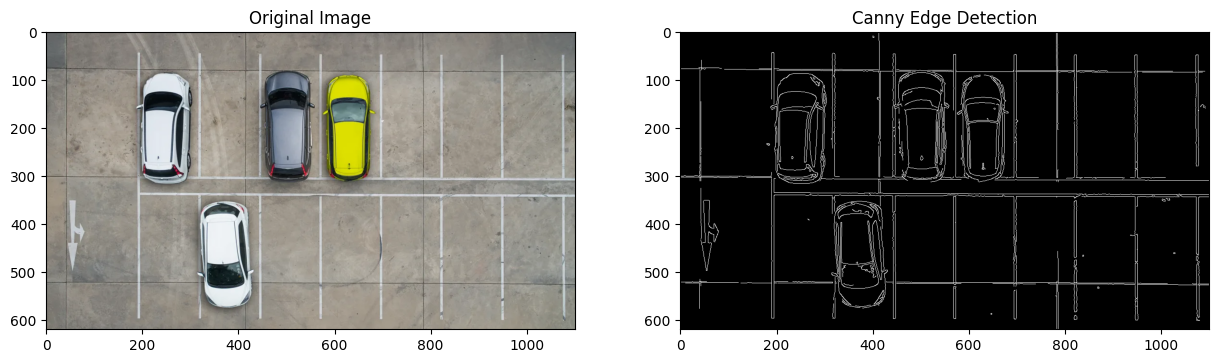

In [6]:
# Read the image
image_car = cv.imread('/content/drive/MyDrive/PCVK/object_detection/car-park.jpg')

# Convert to grayscale
gray = cv.cvtColor(image_car, cv.COLOR_BGR2GRAY)

# Remove noise
blurred = cv.GaussianBlur(gray, (3, 3), 0)

# Apply Canny edge detection
canny_edges = cv.Canny(blurred, 100, 200)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(cv.cvtColor(image_car, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[1].imshow(canny_edges, cmap='gray')
axes[1].set_title("Canny Edge Detection")
plt.show()

 Laplacian Edge Detection

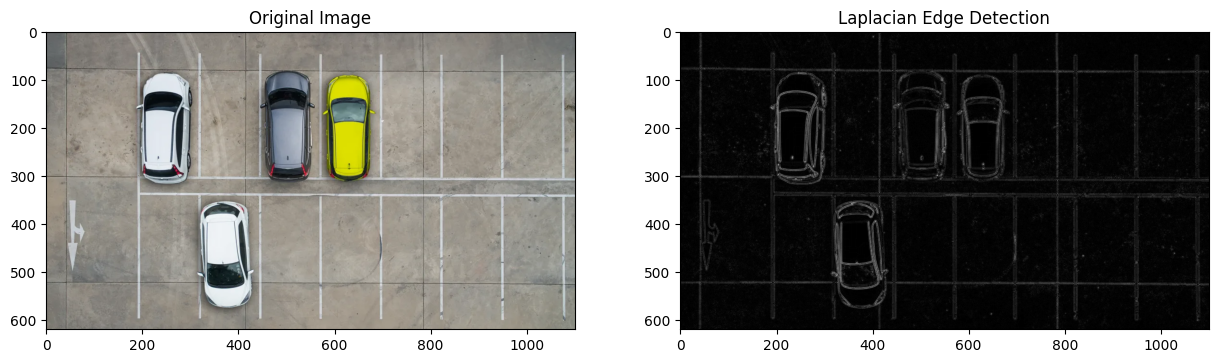

In [10]:
# Read the image
image_car = cv.imread('/content/drive/MyDrive/PCVK/object_detection/car-park.jpg')

# Convert to grayscale
gray = cv.cvtColor(image_car, cv.COLOR_BGR2GRAY)

# Remove noise
blurred = cv.GaussianBlur(gray, (3, 3), 0)

# Apply Laplacian edge detection
laplacian_edges = cv.Laplacian(blurred, cv.CV_64F)
image_filtered = cv.convertScaleAbs(laplacian_edges)
# Display the images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(cv.cvtColor(image_car, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[1].imshow(image_filtered , cmap='gray')
axes[1].set_title("Laplacian Edge Detection")
plt.show()

Implement the Harris Corner Detection and Shi-Tomasi Detection methods on
OpenCV by using the chess-board.jpg image, thus generating
output as follows

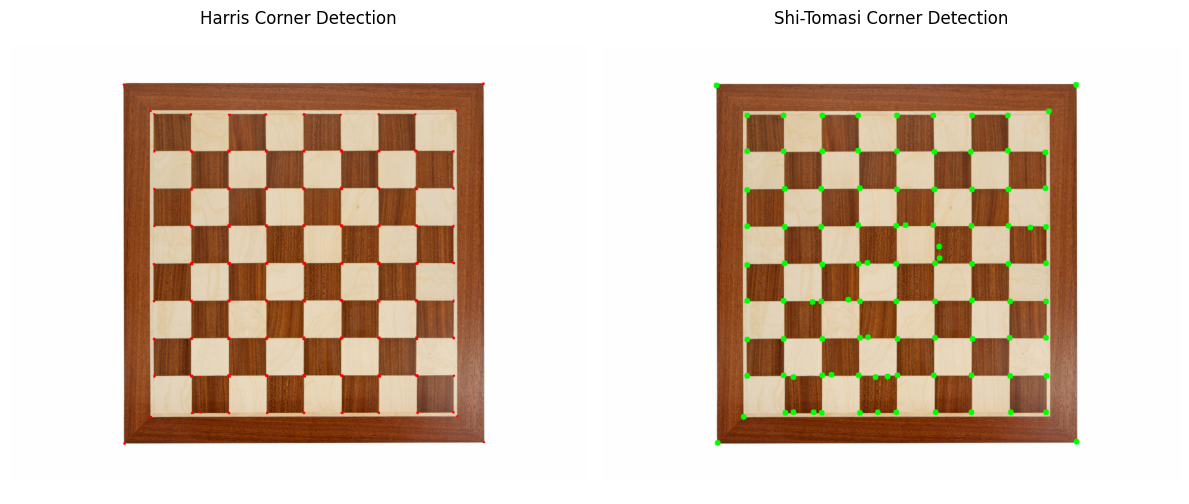

In [55]:
# Load the input image
image_chessboard = cv.imread('/content/drive/MyDrive/PCVK/object_detection/chess-board.jpg')
image_gray = cv.cvtColor(image_chessboard, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
corners_harris = cv.cornerHarris(image_gray, 2, 3, 0.04)
corners_harris_dilated = cv.dilate(corners_harris, None)
harris_output = image_chessboard.copy()
harris_output[corners_harris_dilated > 0.01 * corners_harris_dilated.max()] = [0, 0, 255]

# Shi-Tomasi Corner Detection
corners_shi_tomasi = cv.goodFeaturesToTrack(image_gray, 100, 0.01, 10)
corners_shi_tomasi = np.int0(corners_shi_tomasi)
image_shi_tomasi_output = image_chessboard.copy()
for corner in corners_shi_tomasi:
    x, y = corner.ravel()
    cv.circle(image_shi_tomasi_output, (x, y), 5, (0, 255, 0), -1)

# Display the images with detected corners
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv.cvtColor(harris_output, cv.COLOR_BGR2RGB))
axes[0].set_title("Harris Corner Detection")
axes[0].axis('off')
axes[1].imshow(cv.cvtColor(image_shi_tomasi_output, cv.COLOR_BGR2RGB))
axes[1].set_title("Shi-Tomasi Corner Detection")
axes[1].axis('off')

plt.tight_layout()
plt.show()


Implement the Hough Transform method in OpenCV using the sudoku.jpg image. The
stages of the grid detection process are in accordance with those contained in the
theoretical review,

Number of detected lines: 33


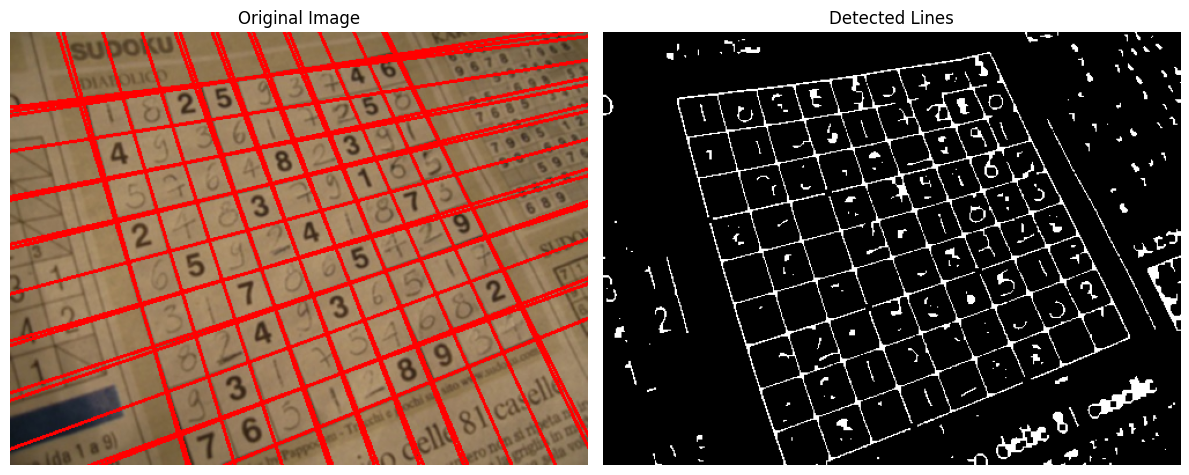

In [30]:
# Load the input image
image_sudoku = cv.imread('/content/drive/MyDrive/PCVK/object_detection/sudoku.jpg')
image_gray = cv.cvtColor(image_sudoku, cv.COLOR_BGR2GRAY)

edges = cv.Canny(image_gray, 90, 150, apertureSize=3)

dilate_kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, dilate_kernel, iterations=1)

erode_kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, erode_kernel, iterations=1)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

if lines is not None:
    num_lines = len(lines)
    print("Number of detected lines:", num_lines)

    # Draw the detected lines on the image
    for line in lines:
        rho, theta = line[0]
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        x0 = cos_theta * rho
        y0 = sin_theta * rho
        x1 = int(x0 + 1000 * (-sin_theta))
        y1 = int(y0 + 1000 * (cos_theta))
        x2 = int(x0 - 1000 * (-sin_theta))
        y2 = int(y0 - 1000 * (cos_theta))
        cv.line(image_sudoku, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the original image and the image with detected lines side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv.cvtColor(image_sudoku, cv.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(cv.cvtColor(edges, cv.COLOR_GRAY2RGB))
    axes[1].set_title("Detected Lines")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No lines detected in the image.")


Implement the findContours() function in OpenCV for contour detection using the laptop.jpg image

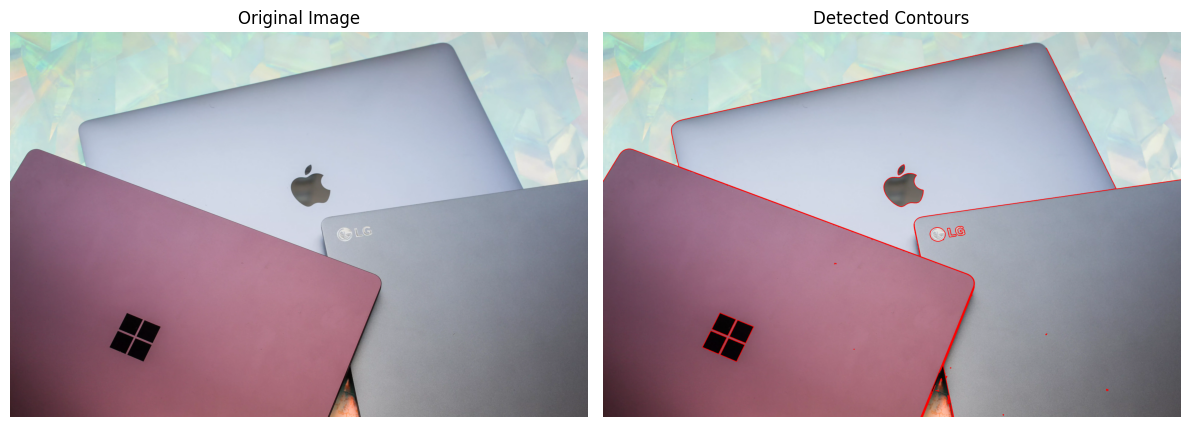

In [33]:
# Load the input image
image_laptop = cv.imread('/content/drive/MyDrive/PCVK/object_detection/laptop.jpg')
gray_laptop = cv.cvtColor(image_laptop, cv.COLOR_BGR2GRAY)

# Apply Canny edge detection
detected_edges = cv.Canny(gray_laptop, 30, 200)

# Find contours
contours_list, contours_hierarchy = cv.findContours(detected_edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Draw contours on the original image
image_contours = image_laptop.copy()
cv.drawContours(image_contours, contours_list, -1, (0, 0, 255), 3)

# Display the original and contour images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv.cvtColor(image_laptop, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))
axes[1].set_title("Detected Contours")
axes[1].axis('off')

plt.tight_layout()
plt.show()
